In [ ]:
#update my code

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import datestr2num
import scipy.stats
from numpy.polynomial.polynomial import polyfit

In [3]:
# read raw data
background_check = pd.read_csv("Resources/nics-firearm-background-checks.csv")
background_check = background_check[['month', 'totals','handgun','long_gun']]
background_check = background_check.rename(columns={'month': 'Date','totals':'Total_check','handgun':'handgun_check','long_gun':'long_gun_check'})

<IPython.core.display.Javascript object>


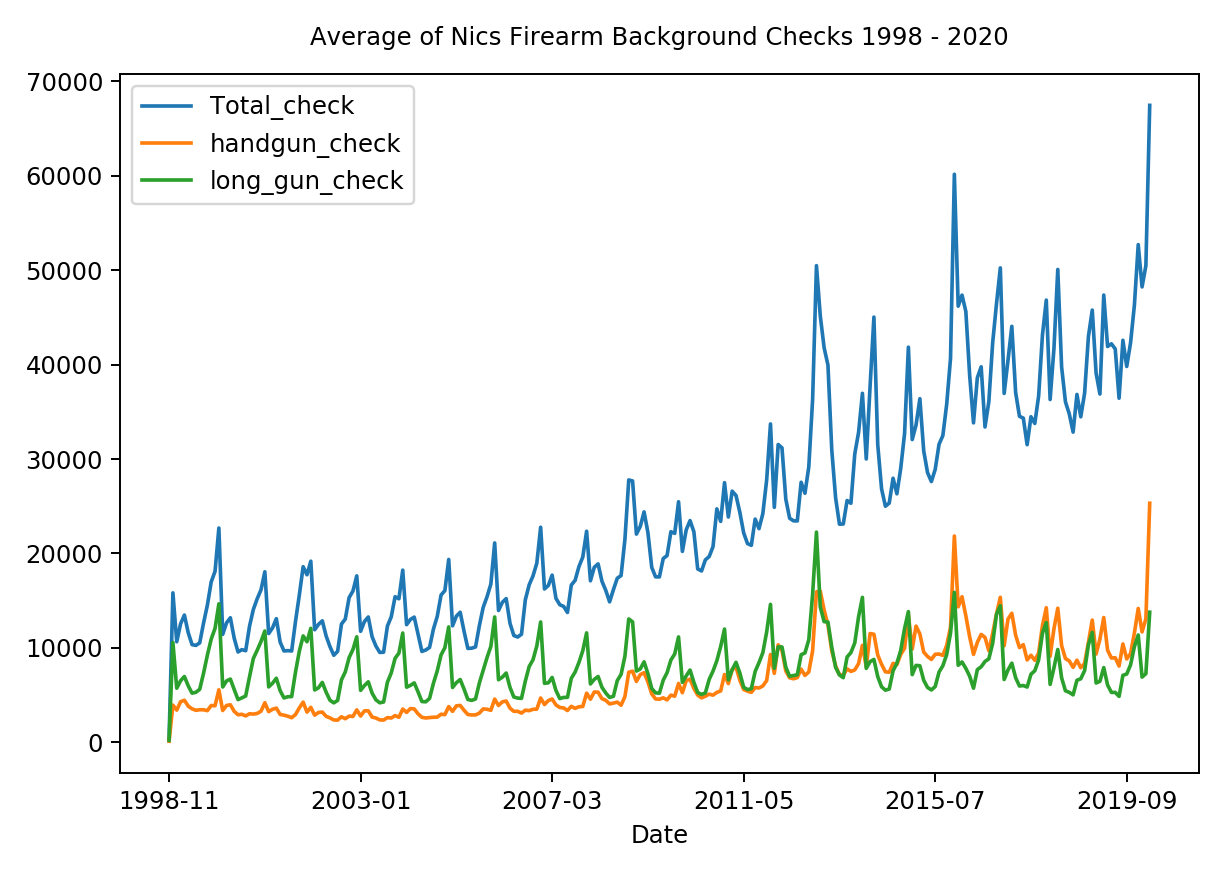

In [4]:
background_check_agg = background_check.groupby('Date').mean()
background_check_agg.plot(figsize=(7,5))
plt.title("Average of Nics Firearm Background Checks 1998 - 2020", y=1.02, fontsize=10);
plt.tight_layout()
# plt.savefig('Average of Nics Firearm Background Checks.png')


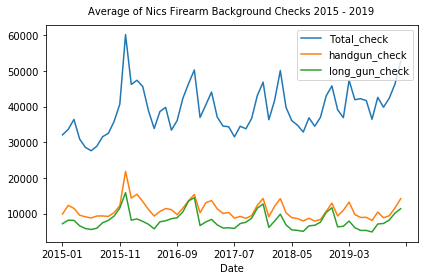

In [33]:
background_check_select = background_check[(background_check['Date'] >= '2015') & (background_check['Date'] <= '2020')]
background_check_select = background_check_select.groupby('Date').mean()
background_check_select.plot()
plt.title("Average of Nics Firearm Background Checks 2015 - 2019", y=1.02, fontsize=10);
plt.tight_layout()
# plt.savefig('Average of Nics Firearm Background Checks.png')


In [5]:
gun_violence = pd.read_csv("Resources/gun-violence-data_01-2013_03-2018.csv")
gun_violence['n_killed/injured'] = gun_violence.n_killed + gun_violence.n_injured
gun_violence['date'] = gun_violence['date'].apply(lambda x: x[: -3])

<IPython.core.display.Javascript object>


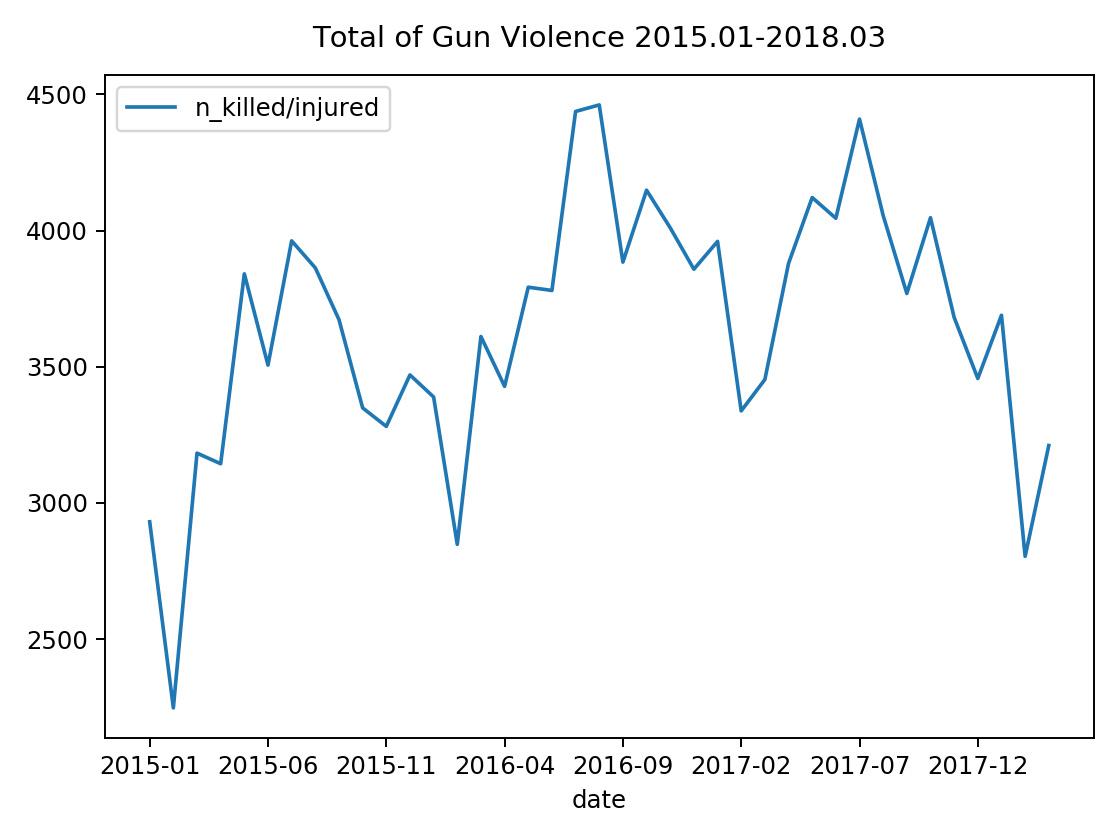

In [6]:
gun_violence = gun_violence[(gun_violence['date'] >= '2015')]
gun_violence = gun_violence[['date','n_killed/injured']]
gun_violence = gun_violence.groupby('date').sum()
# gun_violence = gun_violence.reset_index()
# gun_violence
gun_violence.plot(kind= 'line')
# plt.xticks(rotation = 45)
plt.title("Total of Gun Violence 2015.01-2018.03", y=1.02, fontsize=12);
plt.tight_layout()
# plt.savefig('Average of Gun Violence.png')

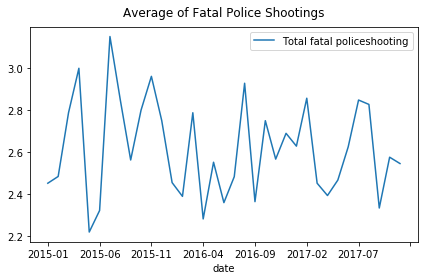

In [32]:
police_shooting = pd.read_csv("Resources/fatal-police-shootings-data.csv")
police_shooting = police_shooting[(police_shooting['date'] >= '2015') & (police_shooting['date'] <= '2018')]
police_shooting['date'] = police_shooting['date'].apply(lambda x: x[: -3]) 
police_shooting = police_shooting.groupby(['date','state']).count() 
police_shooting = police_shooting.reset_index()
police_shooting = police_shooting.groupby('date').mean()
police_shooting
police_shooting = police_shooting[['id']]
police_shooting = police_shooting.rename(columns={'id':'Total fatal policeshooting'})
# drop the last row 
police_shooting = police_shooting[: -1]
police_shooting.plot(kind = "line")

plt.title("Average of Fatal Police Shootings", y=1.02, fontsize=12);

plt.tight_layout()
# plt.savefig('Average of Fatal Police Shootings.png')

In [7]:
background_check_agg_combined = background_check_agg["Total_check"]
gun_violence_combined = gun_violence[["n_killed/injured"]]

In [18]:
combined_shooting_check = pd.concat([background_check_agg_combined, police_shooting*10000], axis=1)
combined_shooting_check = combined_shooting_check.dropna()

<IPython.core.display.Javascript object>


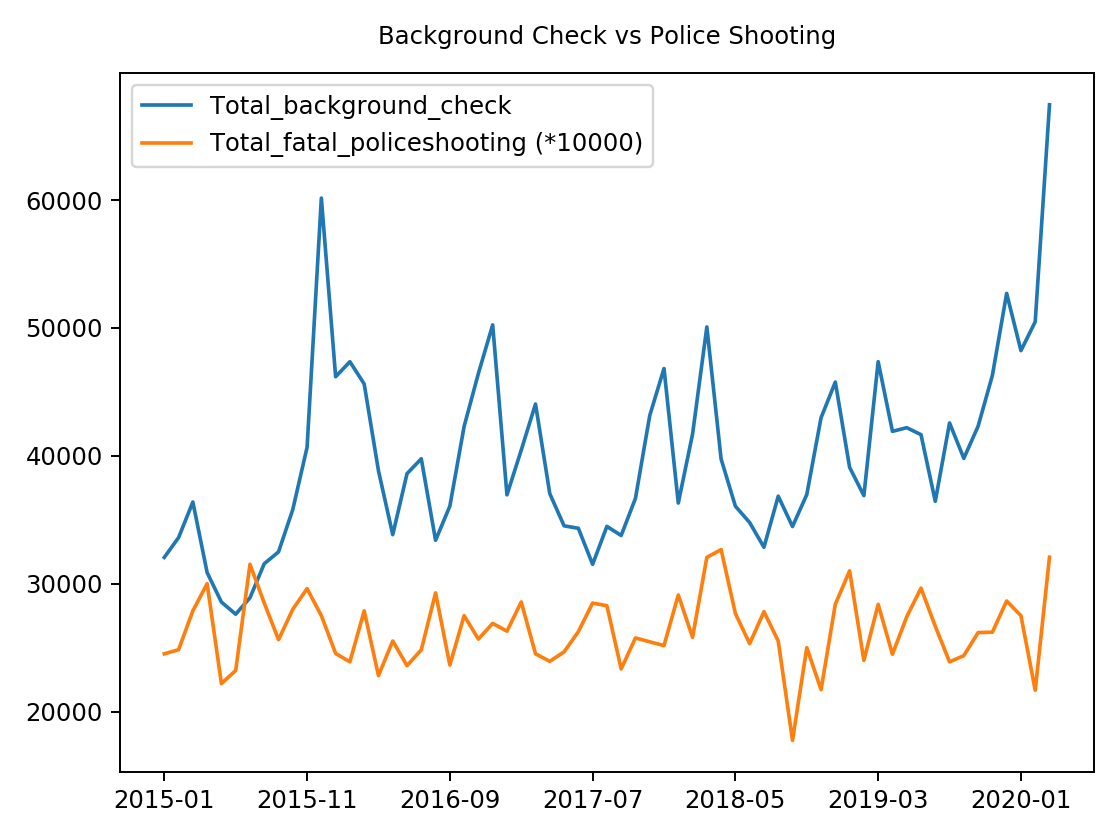

In [19]:
ax = combined_shooting_check.plot()
plt.title("Background Check vs Police Shooting", y=1.02, fontsize=10);
ax.legend(["Total_background_check", "Total_fatal_policeshooting (*10000)"]);
plt.tight_layout()
# plt.savefig('Background Check vs Police Shooting.png')

In [15]:
 scipy.stats.linregress(combined_shooting_check)

LinregressResult(slope=0.043830593720220065, intercept=24585.229308211914, rvalue=0.0995987365559552, pvalue=0.45293388438892823, stderr=0.05799910079152047)

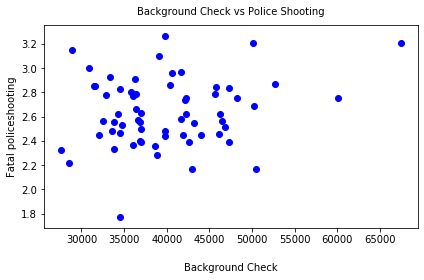

In [20]:
%matplotlib inline
plt.scatter(combined_shooting_check['Total_check'],combined_shooting_check['Total fatal policeshooting']/10000,color="b",label ="vs")
plt.xlabel("Date", labelpad=18)
plt.title("Background Check vs Police Shooting", y=1.02, fontsize=10);
plt.xlabel("Background Check")
plt.ylabel("Fatal policeshooting")
plt.tight_layout()

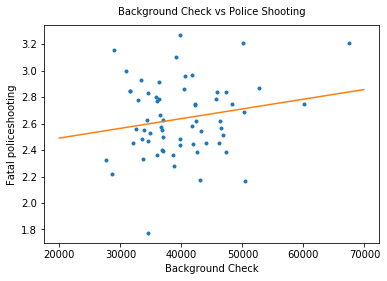

In [21]:
b, m = polyfit(combined_shooting_check['Total_check'],combined_shooting_check['Total fatal policeshooting']/10000,1)

plt.plot(combined_shooting_check['Total_check'],combined_shooting_check['Total fatal policeshooting']/10000, '.')
x = np.arange(20000, 70000, 100)
plt.plot(x, b + m * x )
plt.title("Background Check vs Police Shooting", y=1.02, fontsize=10);
plt.xlabel("Background Check")
plt.ylabel("Fatal policeshooting")
plt.show()
# plt.savefig('Background Check vs Police Shooting(1).png')

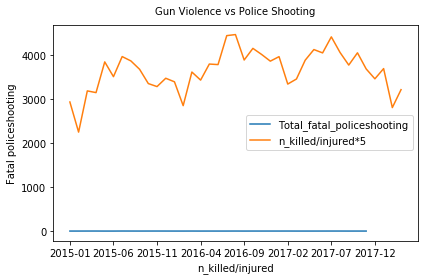

In [34]:
gun_violence_select = gun_violence_combined.loc['2015-01':]
police_shooting_select = police_shooting.loc['2015-01':'2018-03']
combined_shooting_violence = pd.concat([police_shooting_select, gun_violence_select], axis=1)
# combined_shooting_violence = combined_shooting_violence.dropna()
ax = combined_shooting_violence.plot()
ax.legend(["Total_fatal_policeshooting", "n_killed/injured*5"])
plt.title("Gun Violence vs Police Shooting", y=1.02, fontsize=10);
plt.xlabel("n_killed/injured")
plt.ylabel("Fatal policeshooting")
plt.tight_layout()
# plt.savefig('Gun Violence vs Police Shooting.png')
# combined_shooting_violence

In [23]:
scipy.stats.linregress(combined_shooting_violence)

LinregressResult(slope=595.1657730374999, intercept=16639.64378733468, rvalue=0.0613236853569627, pvalue=0.7107450369210041, stderr=1592.5412747871164)

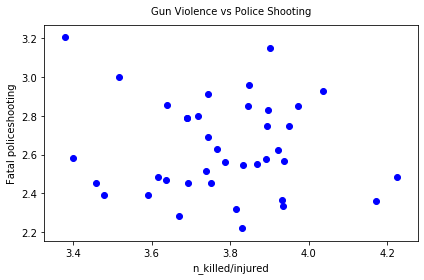

In [21]:
%matplotlib inline
plt.scatter(combined_shooting_violence['n_killed/injured'],combined_shooting_violence['Total fatal policeshooting'],color="b",label ="vs")
plt.title("Gun Violence vs Police Shooting", y=1.02, fontsize=10);
plt.xlabel("n_killed/injured")
plt.ylabel("Fatal policeshooting")
plt.tight_layout()


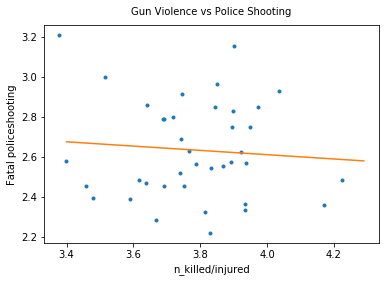

<Figure size 432x288 with 0 Axes>

In [46]:
b, m = polyfit(combined_shooting_violence['n_killed/injured'],combined_shooting_violence['Total fatal policeshooting'],1)

plt.plot(combined_shooting_violence['n_killed/injured'],combined_shooting_violence['Total fatal policeshooting'], '.')
x = np.arange(3.4, 4.3, 0.01)
plt.plot(x, b + m * x)
plt.title("Gun Violence vs Police Shooting", y=1.02, fontsize=10);
plt.xlabel("n_killed/injured")
plt.ylabel("Fatal policeshooting")
plt.show()
plt.tight_layout()
# plt.savefig('Gun Violence vs Police Shooting(1).png')